# Exercicio 1

### Libs importadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

from feature_engine.encoding import CountFrequencyEncoder


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score




### Leitura da base 

In [2]:
###Lendo a base de dados
data =  pd.read_csv('credit_train.csv',sep=',')

C:\Users\felip\AppData\Local\Temp\ipykernel_29036\1480123021.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data =  pd.read_csv('credit_train.csv',sep=',')


In [3]:
#Amostra
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Engenharia e limpeza dos dados

In [4]:
#selecionar colunas do tipo texto e exibir as colunas
data.select_dtypes(include='object').columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
data.select_dtypes(include='object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",7,11.5,_,502.38,31 Years and 6 Months,No,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",7,11.5,_,502.38,31 Years and 7 Months,No,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",6,11.5,Good,502.38,31 Years and 8 Months,No,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",NaN,11.5,Good,502.38,31 Years and 9 Months,No,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [6]:
#listar as colunas do tipo numero ou que deveriam ser numeros
lista_colunas_tratar_num=['Age','Monthly_Inhand_Salary','Annual_Income','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Delay_from_due_date','Num_Credit_Inquiries','Changed_Credit_Limit','Outstanding_Debt','Credit_History_Age','Credit_Utilization_Ratio','Amount_invested_monthly','Monthly_Balance','Total_EMI_per_month']

In [7]:
#colunas do tipo texto
colunas_texto_tratar = [coluna for coluna in data.columns if coluna not in lista_colunas_tratar_num]


In [8]:
data[lista_colunas_tratar_num]

,Age,Monthly_Inhand_Salary,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Delay_from_due_date,Num_Credit_Inquiries,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Credit_Utilization_Ratio,Amount_invested_monthly,Monthly_Balance,Total_EMI_per_month
0,23,1824.843333,19114.12,3,4,3,4,7,3,4.0,11.27,809.98,22 Years and 1 Months,26.822620,80.41529543900253,312.49408867943663,49.574949
1,23,NaN,19114.12,3,4,3,4,NaN,-1,4.0,11.27,809.98,NaN,31.944960,118.28022162236736,284.62916249607184,49.574949
2,-500,NaN,19114.12,3,4,3,4,7,3,4.0,_,809.98,22 Years and 3 Months,28.609352,81.699521264648,331.2098628537912,49.574949
3,23,NaN,19114.12,3,4,3,4,4,5,4.0,6.27,809.98,22 Years and 4 Months,31.377862,199.4580743910713,223.45130972736786,49.574949
4,23,1824.843333,19114.12,3,4,3,4,NaN,6,4.0,11.27,809.98,22 Years and 5 Months,24.797347,41.420153086217326,341.48923103222177,49.574949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,3359.415833,39628.99,4,6,7,2,7,23,3.0,11.5,502.38,31 Years and 6 Months,34.663572,60.97133255718485,479.866228,35.104023
99996,25,3359.415833,39628.99,4,6,7,2,7,18,3.0,11.5,502.38,31 Years and 7 Months,40.565631,54.18595028760385,496.65161,35.104023
99997,25,3359.415833,39628.99,4,6,5729,2,6,27,3.0,11.5,502.38,31 Years and 8 Months,41.255522,24.02847744864441,516.809083,35.104023
99998,25,3359.415833,39628.99,4,6,7,2,NaN,20,3.0,11.5,502.38,31 Years and 9 Months,33.638208,251.67258219721603,319.164979,35.104023


In [9]:
data[colunas_texto_tratar]

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,No,High_spent_Small_value_payments,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",_,No,High_spent_Large_value_payments,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",_,No,High_spent_Medium_value_payments,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments,Standard


In [10]:
#criação do dataset das features categoricas
data_texto = data[colunas_texto_tratar]

In [11]:
#criação do dataset das colunas numericas
data_num = data[lista_colunas_tratar_num]

In [12]:
##exploração do dataset numerico

data_explore=pd.DataFrame(((data_num.isnull().sum()/data_num.shape[0])*100))

In [13]:
##exibição dos campos nulos

data_explore[data_explore[0]>0]

,0
Monthly_Inhand_Salary,15.002
Num_of_Delayed_Payment,7.002
Num_Credit_Inquiries,1.965
Credit_History_Age,9.030
Amount_invested_monthly,4.479
Monthly_Balance,1.200


In [14]:
data[list(data_explore[data_explore[0]>0].index)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly_Inhand_Salary    84998 non-null  float64
 1   Num_of_Delayed_Payment   92998 non-null  object 
 2   Num_Credit_Inquiries     98035 non-null  float64
 3   Credit_History_Age       90970 non-null  object 
 4   Amount_invested_monthly  95521 non-null  object 
 5   Monthly_Balance          98800 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.6+ MB


In [15]:
data_num.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      100000 non-null  object
 1   Annual_Income            100000 non-null  object
 2   Num_of_Loan              100000 non-null  object
 3   Num_of_Delayed_Payment   92998 non-null   object
 4   Changed_Credit_Limit     100000 non-null  object
 5   Outstanding_Debt         100000 non-null  object
 6   Credit_History_Age       90970 non-null   object
 7   Amount_invested_monthly  95521 non-null   object
 8   Monthly_Balance          98800 non-null   object
dtypes: object(9)
memory usage: 6.9+ MB


In [16]:
def corrigir_idade(age_str):
    age_values = [int(age) for age in re.findall(r'\d+', age_str) if 0 <= int(age) < 80]
    return age_values[0] if age_values else None

In [17]:
# Aplicar a função de extração de idade à coluna 'Age'
data_num['Age'] = data_num['Age'].apply(corrigir_idade).ffill().astype('Int64')

C:\Users\felip\AppData\Local\Temp\ipykernel_29036\2235487868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Age'] = data_num['Age'].apply(corrigir_idade).ffill().astype('Int64')


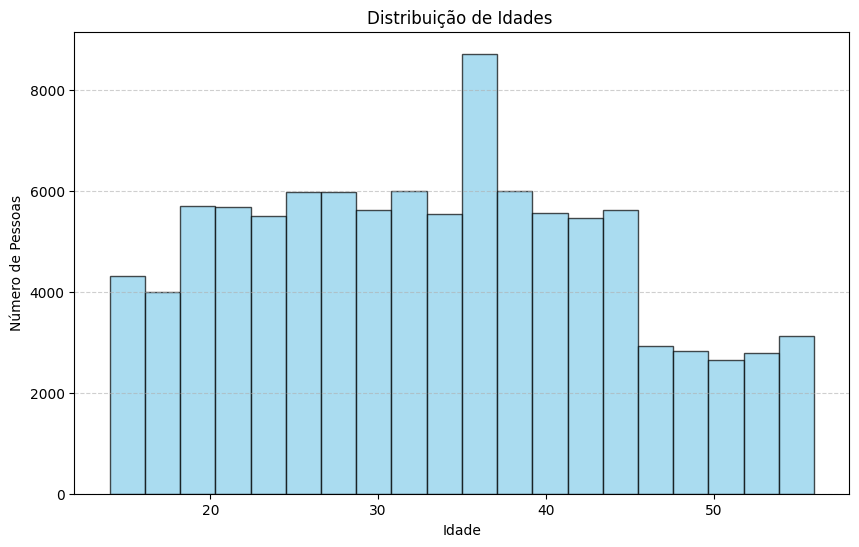

In [18]:
idade = data_num['Age']

plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plotar de idade
plt.hist(idade, bins=20, edgecolor='black', alpha=0.7, color='skyblue')

# rótulos e título
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Idades ')

# grade no eixo Y
ax.yaxis.grid(True, linestyle='--', alpha=0.6)


plt.show()

In [19]:
def conversor_dias(history_age):
    if history_age == 'NA':
        return None

    try:
        parts = history_age.split(' ')
        years = int(parts[0])
        months = int(parts[3])

        # Calcular o total de dias (aproximadamente considerando 30 dias por mês)
        total_days = years * 365 + months * 30

        return total_days
    except (ValueError, IndexError):
        # Tratar erros de conversão ou índices inválidos
        return None


In [20]:
data_num['Credit_History_Age']

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [21]:
data_num['Credit_History_Age'] = data_num['Credit_History_Age'].astype(str)
data_num['Credit_History_Age_Days'] = data_num['Credit_History_Age'].apply(conversor_dias)


C:\Users\felip\AppData\Local\Temp\ipykernel_29036\3779112071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Credit_History_Age'] = data_num['Credit_History_Age'].astype(str)
C:\Users\felip\AppData\Local\Temp\ipykernel_29036\3779112071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Credit_History_Age_Days'] = data_num['Credit_History_Age'].apply(conversor_dias)


In [22]:
data_num['Credit_History_Age_Days']

0         8060.0
1            NaN
2         8120.0
3         8150.0
4         8180.0
          ...   
99995    11495.0
99996    11525.0
99997    11555.0
99998    11585.0
99999    11615.0
Name: Credit_History_Age_Days, Length: 100000, dtype: float64

In [23]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  Int64  
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Annual_Income             100000 non-null  object 
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Num_of_Delayed_Payment    92998 non-null   object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_History_Age        100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [24]:
data_num.select_dtypes(include='object').columns

Index(['Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [25]:
data_num[data_num.select_dtypes(include='object').columns].astype(str)

,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
0,19114.12,4,7,11.27,809.98,22 Years and 1 Months,80.41529543900253,312.49408867943663
1,19114.12,4,nan,11.27,809.98,nan,118.28022162236736,284.62916249607184
2,19114.12,4,7,_,809.98,22 Years and 3 Months,81.699521264648,331.2098628537912
3,19114.12,4,4,6.27,809.98,22 Years and 4 Months,199.4580743910713,223.45130972736786
4,19114.12,4,nan,11.27,809.98,22 Years and 5 Months,41.420153086217326,341.48923103222177
...,...,...,...,...,...,...,...,...
99995,39628.99,2,7,11.5,502.38,31 Years and 6 Months,60.97133255718485,479.86622816574095
99996,39628.99,2,7,11.5,502.38,31 Years and 7 Months,54.18595028760385,496.651610435322
99997,39628.99,2,6,11.5,502.38,31 Years and 8 Months,24.02847744864441,516.8090832742814
99998,39628.99,2,nan,11.5,502.38,31 Years and 9 Months,251.67258219721603,319.1649785257098


In [26]:
data_num[data_num.select_dtypes(include='object').columns] = data_num[data_num.select_dtypes(include='object').columns].replace('_', '', regex=True)
data_num[data_num.select_dtypes(include='object').columns] = data_num[data_num.select_dtypes(include='object').columns].apply(pd.to_numeric,errors='coerce')

C:\Users\felip\AppData\Local\Temp\ipykernel_29036\3846901261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[data_num.select_dtypes(include='object').columns] = data_num[data_num.select_dtypes(include='object').columns].replace('_', '', regex=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_29036\3846901261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[data_num.select_dtypes(include='object').columns] = data_num[data_num.select_dtypes(include='object').columns].apply(pd.to_numer

In [27]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  Int64  
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Annual_Income             100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   float64
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Changed_Credit_Limit      97909 non-null   float64
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_History_Age        0 non-null       float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [28]:
data_num.drop('Credit_History_Age',axis=1,inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_29036\1267242665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num.drop('Credit_History_Age',axis=1,inplace=True)


In [29]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.31799,10.76921,14.0,24.0,33.0,42.0,56.0
Monthly_Inhand_Salary,84998.0,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Annual_Income,100000.0,176415.701298,1429618.051414,7005.93,19457.5,37578.61,72790.92,24198062.0
Num_Bank_Accounts,100000.0,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,100000.0,22.47443,129.05741,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,100000.0,72.46604,466.422621,1.0,8.0,13.0,20.0,5797.0
Num_of_Loan,100000.0,3.00996,62.647879,-100.0,1.0,3.0,5.0,1496.0
Num_of_Delayed_Payment,92998.0,30.923342,226.031892,-3.0,9.0,14.0,18.0,4397.0
Delay_from_due_date,100000.0,21.06878,14.860104,-5.0,10.0,18.0,28.0,67.0
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.0,3.0,6.0,9.0,2597.0


In [30]:
###inicio de tratamento das colunas categoricas
data_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID                     100000 non-null  object
 1   Customer_ID            100000 non-null  object
 2   Month                  100000 non-null  object
 3   Name                   90015 non-null   object
 4   SSN                    100000 non-null  object
 5   Occupation             100000 non-null  object
 6   Type_of_Loan           88592 non-null   object
 7   Credit_Mix             100000 non-null  object
 8   Payment_of_Min_Amount  100000 non-null  object
 9   Payment_Behaviour      100000 non-null  object
 10  Credit_Score           100000 non-null  object
dtypes: object(11)
memory usage: 8.4+ MB


In [31]:
unique_occupations = data_texto['Occupation'].unique()
print(unique_occupations)

['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


In [32]:
#Tratando Occupation
# Substituir valores específicos por pd.NA
data_texto['Occupation'] = data_texto['Occupation'].replace('_______', pd.NA)

# Agrupar por 'Customer_ID' e aplicar transform para encontrar a ocupação mais comum
data_texto['Co_Occupation'] = data_texto.groupby('Customer_ID')['Occupation'].transform(lambda x: x.mode().iat[0])

data_texto.drop(columns=['Occupation'], inplace=True)

# Renomear a nova coluna para 'Occupation'
data_texto.rename(columns={'Co_Occupation': 'Occupation'}, inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_29036\4209042105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_texto['Occupation'] = data_texto['Occupation'].replace('_______', pd.NA)
C:\Users\felip\AppData\Local\Temp\ipykernel_29036\4209042105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_texto['Co_Occupation'] = data_texto.groupby('Customer_ID')['Occupation'].transform(lambda x: x.mode().iat[0])
C:\Users\felip\AppData\Local\Temp\ipykernel_29036\4209042105.py:8: SettingWithCopyWarning: 
A

In [33]:
data_texto['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [34]:
#Tratamento para Type_of_Loan para valores nulos
data_texto['Type_of_Loan'].fillna('Unknown_Loan', inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_29036\585374682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_texto['Type_of_Loan'].fillna('Unknown_Loan', inplace=True)


In [35]:
#Tratamento das colunas de  Credit_Mix
data_texto['Credit_Mix'].unique()


array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [36]:
data_texto['Credit_Mix'] = data_texto['Credit_Mix'].str.replace('_', 'Unknown_credit_mix')

C:\Users\felip\AppData\Local\Temp\ipykernel_29036\1707607667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_texto['Credit_Mix'] = data_texto['Credit_Mix'].str.replace('_', 'Unknown_credit_mix')


In [37]:
data_texto['Credit_Mix'].unique()

array(['Unknown_credit_mix', 'Good', 'Standard', 'Bad'], dtype=object)

In [38]:
#Tratamento das colunas de  Payment_Behaviour
data_texto['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [39]:
data_texto['Payment_Behaviour'] = data_texto['Payment_Behaviour'].str.replace('!@9#%8', 'Unknown_Payment_Behaviour')

C:\Users\felip\AppData\Local\Temp\ipykernel_29036\3779601635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_texto['Payment_Behaviour'] = data_texto['Payment_Behaviour'].str.replace('!@9#%8', 'Unknown_Payment_Behaviour')


In [40]:
data_texto['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', 'Unknown_Payment_Behaviour',
       'High_spent_Large_value_payments'], dtype=object)

In [41]:
data_antes_treinar = pd.concat([data_texto,data_num],axis=1)

In [42]:
###Completando os campos nulos das colunas numericas, sendo segmentado pelo grão mais baixo (granularidade mais baixa = Customer_ID)#######

data_fill = data_antes_treinar.copy()

colunas_numericas = data_num.columns

for coluna in colunas_numericas:
     data_fill[coluna] = data_fill.groupby('Customer_ID')[coluna].transform(lambda x: x.fillna(x.median()))

In [ ]:
##Checar valores nulos restantes do dataset
data_fill.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        9985
SSN                            0
Type_of_Loan                   0
Credit_Mix                     0
Payment_of_Min_Amount          0
Payment_Behaviour              0
Credit_Score                   0
Occupation                     0
Age                            0
Monthly_Inhand_Salary          0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Num_of_Delayed_Payment         0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Changed_Credit_Limit           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Amount_invested_monthly        0
Monthly_Balance                0
Total_EMI_per_month            0
Credit_History_Age_Days        0
dtype: int64

### Entendendo e Mapeando o Target

In [ ]:
###Conhecendo os valores do TARGET ######
data_fill['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
#### DEFININDO VALORES DE TARGET####
#   Poor = 0
#   Standard = 1 
#   Good = 2


# Definir o mapeamento
map_credit_score = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}

# Aplicar o mapeamento à coluna 'Credit_Score'
data_fill['Credit_Score'] = data_fill['Credit_Score'].map(map_credit_score)


### Separação de Features e Target

In [ ]:
X = data_fill.drop(['ID', 'Customer_ID', 'Name', 'SSN','Credit_Score'], axis=1)
Y = data_fill['Credit_Score']

#### Encoding

In [ ]:
######ENCODING FEATURES###############


##Transformando os dados categoricos em frequencias
encoder = CountFrequencyEncoder(encoding_method='frequency',
                         variables=list(X.select_dtypes(include='object').columns))
# Treinar o encoder
encoder.fit(X)

# Transformar os dados
X_encoded= encoder.transform(X)


encoder.encoder_dict_

{'Month': {'January': 0.125,
  'February': 0.125,
  'March': 0.125,
  'April': 0.125,
  'May': 0.125,
  'June': 0.125,
  'July': 0.125,
  'August': 0.125},
 'Type_of_Loan': {'Unknown_Loan': 0.11408,
  'Not Specified': 0.01408,
  'Credit-Builder Loan': 0.0128,
  'Personal Loan': 0.01272,
  'Debt Consolidation Loan': 0.01264,
  'Student Loan': 0.0124,
  'Payday Loan': 0.012,
  'Mortgage Loan': 0.01176,
  'Auto Loan': 0.01152,
  'Home Equity Loan': 0.01136,
  'Personal Loan, and Student Loan': 0.0032,
  'Not Specified, and Payday Loan': 0.00272,
  'Mortgage Loan, and Home Equity Loan': 0.00264,
  'Student Loan, and Payday Loan': 0.00256,
  'Student Loan, and Credit-Builder Loan': 0.00248,
  'Credit-Builder Loan, and Not Specified': 0.00248,
  'Payday Loan, and Debt Consolidation Loan': 0.0024,
  'Payday Loan, and Auto Loan': 0.0024,
  'Mortgage Loan, and Not Specified': 0.00232,
  'Payday Loan, and Personal Loan': 0.00232,
  'Auto Loan, and Personal Loan': 0.00232,
  'Payday Loan, and Stu

### Criação das bases de treino e teste (80:20)

In [ ]:
#Criação das bases de treino e teste no formato 80:20

X_train, X_test, y_train, y_test = train_test_split(X_encoded,Y,test_size=0.2,random_state=42)

### Teste com Modelo Random Forest (já possui feature selecion interno)

In [ ]:
######FEATURE SELECTION E CRIAÇÃO DO MODELO RANDOM FOREST ############
forest=RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Selecionando as features que foram usadas no Random forest (ESTE MODELO JA POSSUI UM FEATURE SELECTION INTERNO)
select = SelectFromModel(forest)
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
select.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False,  True])

In [ ]:
#Print das features utilizadas no modelo Random forest
features= X_train.columns[(select.get_support())]

print(features)



Index(['Credit_Mix', 'Interest_Rate', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_Days'],
      dtype='object')


In [ ]:
y_pred_test = forest.predict(X_test)

#### Avaliação do Modelo Random Forest

In [ ]:
# Score do modelo Random forest
accuracy_score(y_test, y_pred_test)

0.8022

In [ ]:
score_medio = cross_val_score(forest, X_train, y_train,
                            scoring='accuracy', cv=5)

print(score_medio.mean())

0.7929625


In [ ]:
# Classificação das arvores criadas durante do Random Forest
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      5874
           1       0.82      0.82      0.82     10599
           2       0.77      0.73      0.75      3527

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



### Teste com arvore de decisao classificatoria

#### Feature Selection

In [ ]:
####Abordando o problema agora com Arvore classificatoria####
### Essa arvore tambem é robusta a outliers e escala #####

###Antes temos que fazer a melhor set de features para o modelo (antes em Random Forest, era selecionado automaticamente)###
### No caso vamos focar em achar fazer um classificador com melhor acuracia#####

###Feature selection###


##Para a arvore primeiramente fazer um feature selection usando o forward selection pela metrica de acuracia###


ar = DecisionTreeClassifier()

sfs1 = SFS(ar, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)


[2023-10-06 00:56:18] Features: 1/10 -- score: 0.7964249999999999
[2023-10-06 00:57:04] Features: 2/10 -- score: 0.7971750000000001
[2023-10-06 00:58:03] Features: 3/10 -- score: 0.7974125
[2023-10-06 00:59:02] Features: 4/10 -- score: 0.7975125000000001
[2023-10-06 01:00:01] Features: 5/10 -- score: 0.7976249999999999
[2023-10-06 01:00:59] Features: 6/10 -- score: 0.7953625000000001
[2023-10-06 01:02:00] Features: 7/10 -- score: 0.7939624999999999
[2023-10-06 01:03:13] Features: 8/10 -- score: 0.7904625
[2023-10-06 01:04:25] Features: 9/10 -- score: 0.7859499999999999
[2023-10-06 01:05:37] Features: 10/10 -- score: 0.7832

In [ ]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
#As melhores features para esta arvore de decisao são
#'Type_of_Loan','Occupation','Monthly_Inhand_Salary','Outstanding_Debt'

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(7,)","[0.79725, 0.7950625, 0.7948125, 0.7980625, 0.7...",0.796425,"(Monthly_Inhand_Salary,)",0.001634,0.001271,0.000636
2,"(7, 17)","[0.798, 0.795625, 0.796125, 0.7993125, 0.7968125]",0.797175,"(Monthly_Inhand_Salary, Outstanding_Debt)",0.001713,0.001333,0.000667
3,"(5, 7, 17)","[0.7985, 0.796, 0.7965625, 0.7990625, 0.7969375]",0.797412,"(Occupation, Monthly_Inhand_Salary, Outstandin...",0.001504,0.00117,0.000585
4,"(1, 5, 7, 17)","[0.799, 0.79625, 0.7964375, 0.798875, 0.797]",0.797513,"(Type_of_Loan, Occupation, Monthly_Inhand_Sala...",0.00153,0.00119,0.000595
5,"(0, 1, 5, 7, 17)","[0.7986875, 0.79625, 0.7966875, 0.799, 0.7975]",0.797625,"(Month, Type_of_Loan, Occupation, Monthly_Inha...",0.001385,0.001077,0.000539
6,"(0, 1, 5, 6, 7, 17)","[0.7960625, 0.795375, 0.79475, 0.7978125, 0.79...",0.795363,"(Month, Type_of_Loan, Occupation, Age, Monthly...",0.002102,0.001635,0.000818
7,"(0, 1, 5, 6, 7, 8, 17)","[0.79525, 0.7930625, 0.792, 0.7965625, 0.7929375]",0.793962,"(Month, Type_of_Loan, Occupation, Age, Monthly...",0.002161,0.001681,0.000841
8,"(0, 1, 5, 6, 7, 8, 9, 17)","[0.79075, 0.790125, 0.7879375, 0.7941875, 0.78...",0.790462,"(Month, Type_of_Loan, Occupation, Age, Monthly...",0.002682,0.002087,0.001043
9,"(0, 1, 5, 6, 7, 8, 9, 10, 17)","[0.7876875, 0.7841875, 0.7835625, 0.789125, 0....",0.78595,"(Month, Type_of_Loan, Occupation, Age, Monthly...",0.002726,0.002121,0.00106
10,"(0, 1, 5, 6, 7, 8, 9, 10, 11, 17)","[0.7831875, 0.7829375, 0.7815, 0.7863125, 0.78...",0.7832,"(Month, Type_of_Loan, Occupation, Age, Monthly...",0.002146,0.00167,0.000835


#### Filtro da base de treino e teste para obter o set otimo de features

In [ ]:
#Filtro da base de treino e teste para arvore de decisao
X_train_otimo =X_train[['Type_of_Loan','Occupation','Monthly_Inhand_Salary','Outstanding_Debt']]
X_test_otimo = X_test[['Type_of_Loan','Occupation','Monthly_Inhand_Salary','Outstanding_Debt']]

#### Criação do modelo de arvore de decisão classicatoria e avaliações

In [ ]:
ar = DecisionTreeClassifier()
ar.fit(X_train_otimo,y_train)
y_pred_test_ar = ar.predict(X_test_otimo)

In [ ]:
##Acuracia do Modelo de arvore
accuracy_score(y_test, y_pred_test_ar)

0.80975

In [ ]:
score_medio = cross_val_score(ar, X_train_otimo, y_train,
                            scoring='accuracy', cv=5)

print(score_medio.mean())

0.7974874999999999


In [ ]:
print(classification_report(y_test, y_pred_test_ar))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83      5874
           1       0.84      0.79      0.82     10599
           2       0.77      0.76      0.76      3527

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000



### Conclusão

#####  1 - Modelo de arvore configurado para o set ótimo de features opera com menos colunas: 9 - Random Forest e 4 - Arvore
#####  2 - Modelo de arvore passa a precisao de random forest por muito pouco, já validado com validação cross com K=5 (Random = 0.794325 e Arvore =0.79746 )  
#####  3 - Modelo de arvore indiscutivelmente opera com MUITO menos processamento que random forest


##### Resultado : Pelo fato de consumir menos colunas e operar em menos tempo estaremos usando o modelo de arvore classificatoria para este exercicio como modelo de ML final para entrega.

# Exercício 2

In [ ]:
#Criando Clusters por K-means

#Incialmente removes os outliers

In [ ]:
data_all = pd.concat([X_encoded[['Type_of_Loan','Occupation','Monthly_Inhand_Salary','Outstanding_Debt']],Y],axis=1)

In [ ]:
data_all['Credit_Score']=data_all['Credit_Score'].astype(float)

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Type_of_Loan           100000 non-null  float64
 1   Occupation             100000 non-null  float64
 2   Monthly_Inhand_Salary  100000 non-null  float64
 3   Outstanding_Debt       100000 non-null  float64
 4   Credit_Score           100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB


In [ ]:
def remover_outliers_iqr(df):
    df_sem_outliers = df.copy()  
    Q1 = df_sem_outliers['Credit_Score'].quantile(0.25)
    Q3 = df_sem_outliers['Credit_Score'].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_sem_outliers = df_sem_outliers[(df_sem_outliers['Credit_Score'] >= limite_inferior) & (df_sem_outliers['Credit_Score'] <= limite_superior)]
    return df_sem_outliers

# Aplicar a função de remoção de outliers à coluna 'Credit_Score'
data_no_outliers = remover_outliers_iqr(data_all)

In [ ]:
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Type_of_Loan           100000 non-null  float64
 1   Occupation             100000 non-null  float64
 2   Monthly_Inhand_Salary  100000 non-null  float64
 3   Outstanding_Debt       100000 non-null  float64
 4   Credit_Score           100000 non-null  float64
dtypes: float64(5)
memory usage: 4.6 MB


In [ ]:
data_no_outliers.head()

,Type_of_Loan,Occupation,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Score
0,0.00008,0.06744,1824.843333,809.98,2.0
1,0.00008,0.06744,1824.843333,809.98,2.0
2,0.00008,0.06744,1824.843333,809.98,2.0
3,0.00008,0.06744,1824.843333,809.98,2.0
4,0.00008,0.06744,1824.843333,809.98,2.0


In [ ]:
###Deixando o dataset com a msm escala usando Min MAX escaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_escaled= scaler.fit_transform(data_no_outliers[['Type_of_Loan', 'Occupation', 'Monthly_Inhand_Salary','Outstanding_Debt']])
data_escaled = pd.DataFrame(data_escaled, columns=['Type_of_Loan', 'Occupation', 'Monthly_Inhand_Salary','Outstanding_Debt'])


In [ ]:
data_for_kmeans = pd.concat([data_escaled, data_no_outliers['Credit_Score'].reset_index(drop=True)], axis=1)


In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


colunas_kmeans = ['Type_of_Loan', 'Occupation', 'Monthly_Inhand_Salary', 'Outstanding_Debt']

data_kmeans = data_escaled

# Aplicar K-Means com K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_kmeans)

c:\Users\felip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
#Posição dos centroids
print(kmeans.cluster_centers_)

[[0.00145615 0.4538465  0.14976228 0.60266623]
 [1.         0.45669883 0.32912393 0.15330747]
 [0.02368156 0.4719708  0.29733843 0.17190364]]


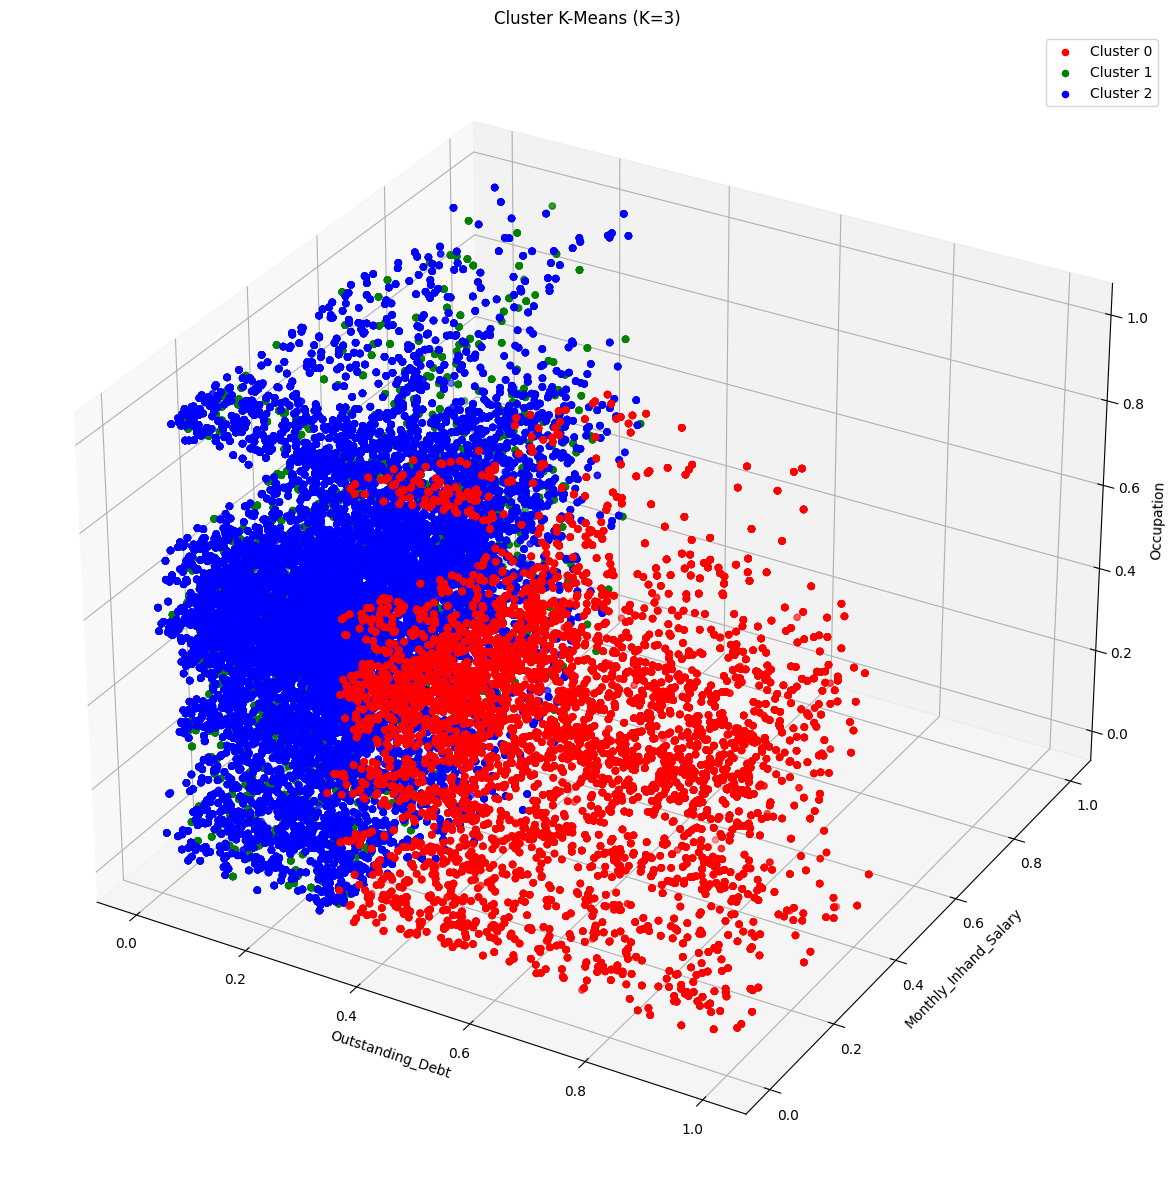

In [ ]:
#Label dos clusters
labels = kmeans.labels_
data_for_kmeans['Cluster'] = labels


# Hora de plotar o cluster
fig = plt.figure(figsize= (25,15))
ax = fig.add_subplot(111, projection='3d')

x = data_for_kmeans[colunas_kmeans[3]]
y = data_for_kmeans[colunas_kmeans[2]]
z = data_for_kmeans[colunas_kmeans[1]]

cores = ['r', 'g', 'b']
for cluster, cor in enumerate(cores):
    cluster_points = data_for_kmeans[data_for_kmeans['Cluster'] == cluster]
    ax.scatter(cluster_points[colunas_kmeans[3]], cluster_points[colunas_kmeans[2]], cluster_points[colunas_kmeans[1]], c=cor, label=f'Cluster {cluster}')


ax.set_xlabel(colunas_kmeans[3])
ax.set_ylabel(colunas_kmeans[2])
ax.set_zlabel(colunas_kmeans[1])
plt.title('Cluster K-Means (K=3)')
plt.legend()
plt.show()

In [ ]:
df = data_for_kmeans.groupby(['Cluster'], as_index=False).mean()

<Axes: xlabel='Cluster', ylabel='Type_of_Loan'>

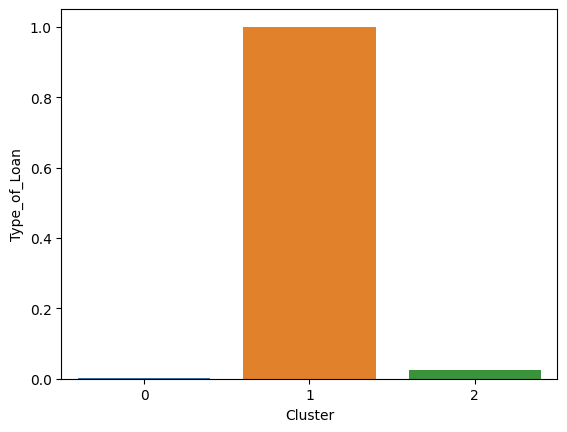

In [ ]:
###Plotagem para descrever os clusters
sns.barplot(x='Cluster',y='Type_of_Loan',data=df)

<Axes: xlabel='Cluster', ylabel='Occupation'>

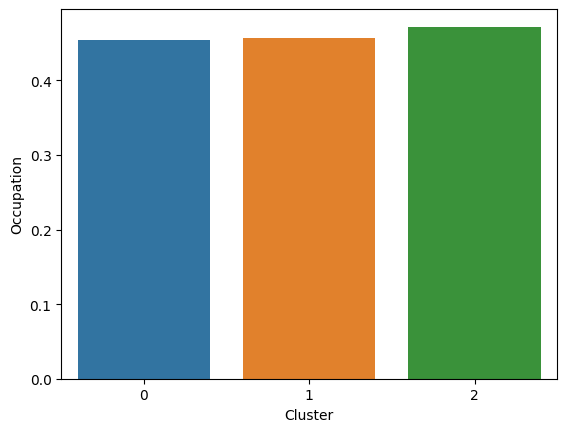

In [ ]:
###Plotagem para descrever os clusters
sns.barplot(x='Cluster',y='Occupation',data=df)

<Axes: xlabel='Cluster', ylabel='Monthly_Inhand_Salary'>

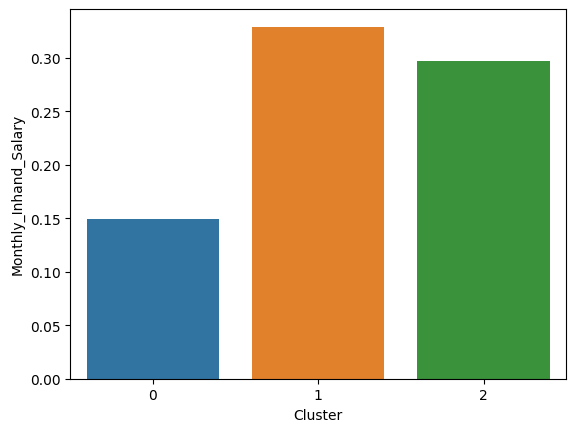

In [ ]:
###Plotagem para descrever os clusters
sns.barplot(x='Cluster',y='Monthly_Inhand_Salary',data=df)

<Axes: xlabel='Cluster', ylabel='Outstanding_Debt'>

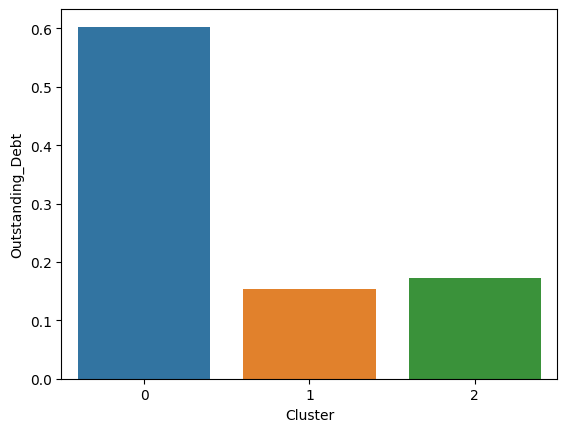

In [ ]:
###Plotagem para descrever os clusters
sns.barplot(x='Cluster',y='Outstanding_Debt',data=df)

In [ ]:
##Descrições do Cluster
# Cluster 0 -> Profissoes que não fizeram nenhum tipo de emprestimo,  possuem renda mensal liquida baixa  e  existe um alto valor de dividas
# Cluster 1 -> Profissoes que fizeram muitos emprestimos , possuem a renda mensal liquida mais alto e  possuem pouco valor de divida
# Cluster 2 -> Profissoes que quase nunca fazem emprestimos, possuem uma boa renda mensal liquida e possuem um valor médio de divida